## Basic Statistics - A Review
__Prepared by: Matthew R Maulion__

**Importing important libraries**

In [1]:
from src.config import DirectoryPaths
#fundamental standard python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#used in building our linear regression model
from sklearn.linear_model import LinearRegression

#for our linear regression results
import statsmodels.api as sm

#matplotlib magic 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

2025-09-20 16:11:26.482 | INFO     | src.config:<module>:26 - Loaded environment variables from /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.env
2025-09-20 16:11:26.483 | INFO     | src.config:<module>:49 - PROJECT_ROOT: /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes
2025-09-20 16:11:26.483 | INFO     | src.config:<module>:50 - DATA_DIR: /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/data


In [3]:
#set the figsize for all graphs moving forward
plt.rcParams['figure.figsize'] = [10, 7.5]

## Reading the Dataset 

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

In [5]:
#reading the dataset to be used "shampoo.csv" 
data = pd.read_csv(DirectoryPaths.EXTERNAL_DATA.value / "shampoo.csv")

In [6]:
#view the dataset
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [7]:
#view first 5 rows of dataset
data.head(5)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [8]:
#view first 10 rows of dataset
data.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [9]:
#view first 10 rows of dataset
data.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


## Descriptive Statistics

In [10]:
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### Dataset summary 

In [11]:
#centrality and variation summary
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [12]:
#since 'data' is a dataframe, you can instantiate a method in pandas to immediately get the mean
data['Sales'].mean(axis=0)

np.float64(312.59999999999997)

In [13]:
#since 'data' is a dataframe, you can instantiate a method in pandas to immediately get the std
data['Sales'].std(axis=0)

np.float64(148.93716412347476)

### Visualizations 
#### Histograms

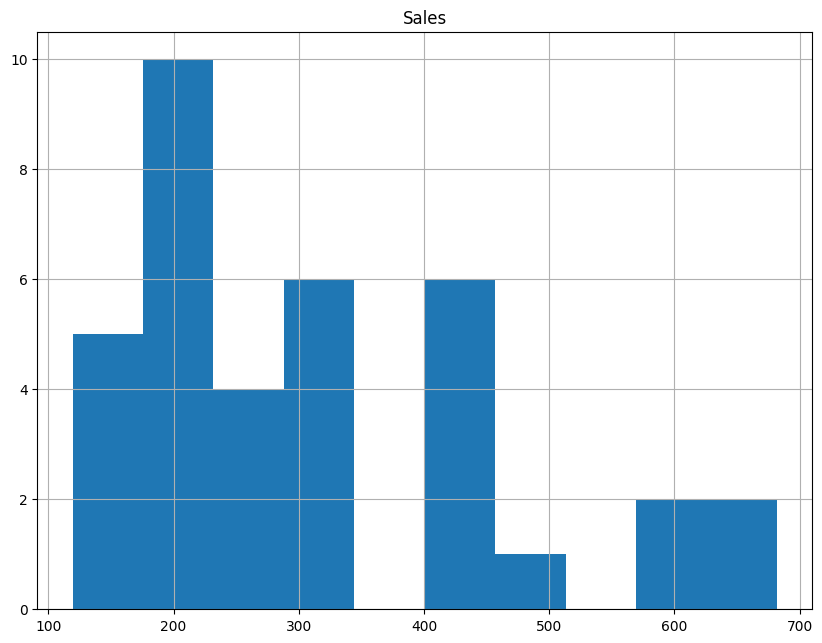

In [20]:
#since 'data' is a dataframe, you can instantiate a method in pandas to immediately get the hist
data.hist();

Text(0, 0.5, 'Frequency')

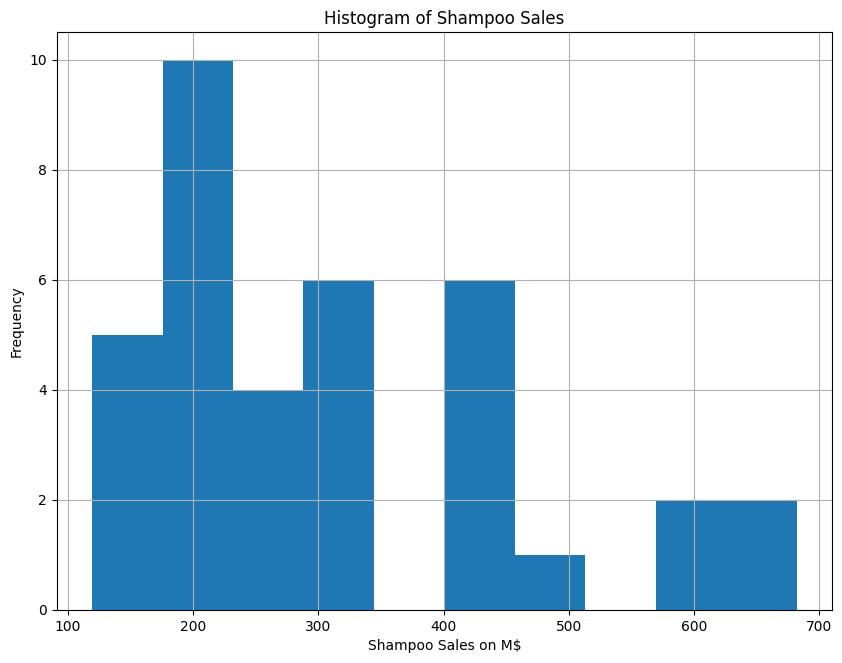

In [21]:
#use to only plot a portion of dataframe 'Sales'
data.hist()

#what to use give a title 'Histogram of Shampoo Sales'
plt.title('Histogram of Shampoo Sales')

#what to use to give an x_label 'Shampoo Sales on M$'
plt.xlabel('Shampoo Sales on M$')

#what to use to give a y_label 'Frequency'
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

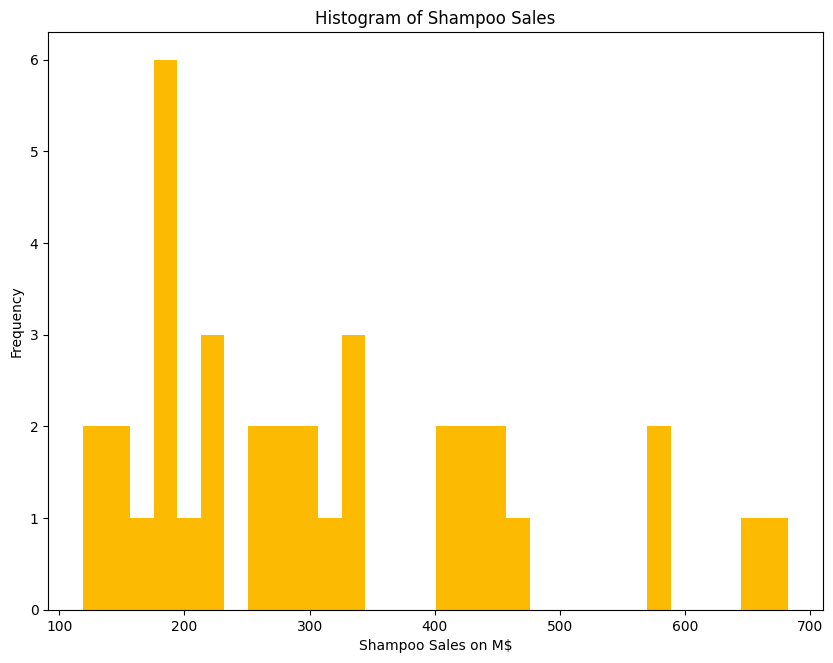

In [26]:
#use to only plot a portion of dataframe 'Sales' and increase bins to see granular (zoomed in) behavior and use color '#fcba03

plt.hist(data['Sales'], bins=30, color='#fcba03')
#what to use give a title 'Histogram of Shampoo Sales'
plt.title('Histogram of Shampoo Sales')

#what to use to give an x_label 'Shampoo Sales on M$'
plt.xlabel('Shampoo Sales on M$')

#what to use to give a y_label 'Frequency'
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

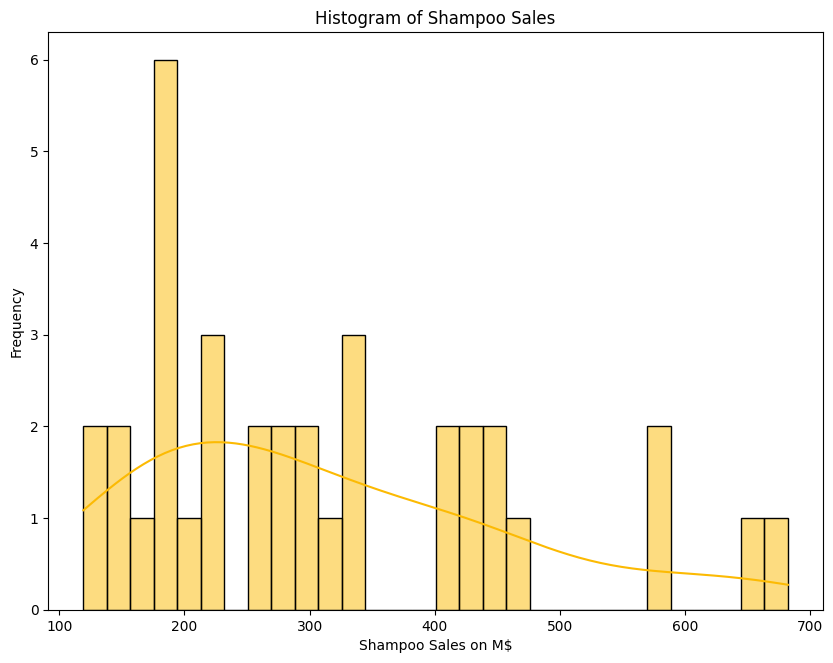

In [30]:
#use seaborn for a another version of the histogram (with a distrbution line)

ax = sns.histplot(x=data['Sales'], kde=True, bins=30, color='#fcba03')
#what to use give a title 'Histogram of Shampoo Sales'
ax.set_title('Histogram of Shampoo Sales')

#what to use to give an x_label 'Shampoo Sales on M$'
ax.set_xlabel('Shampoo Sales on M$')

#what to use to give a y_label 'Frequency'
ax.set_ylabel('Frequency')


### Scatter plots 

<Axes: xlabel='Sales', ylabel='Month'>

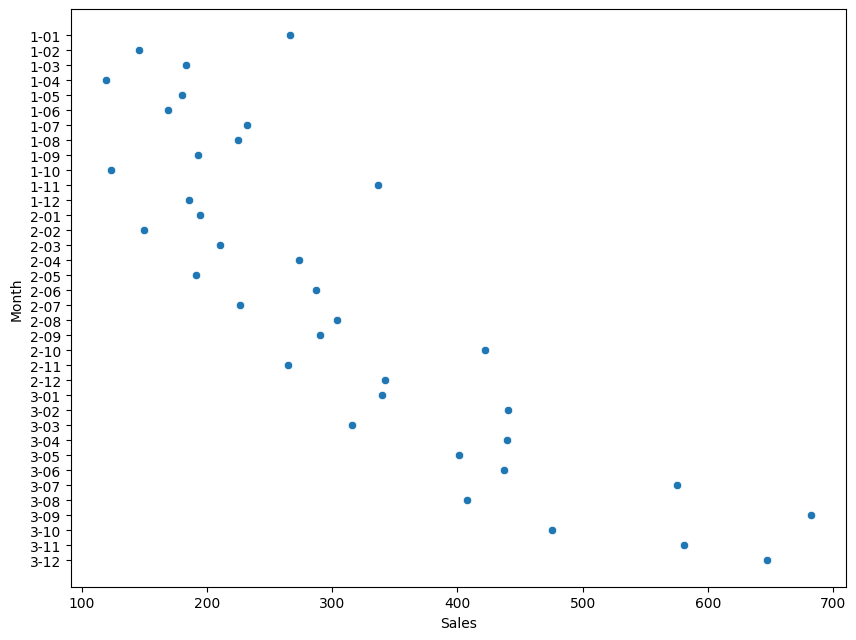

In [34]:
#If you want to have a bigger sized plot, you can disregard RCparams and create a new plot with a bigger size


#make scatter plot by identifying the x and y data from our dataset 
sns.scatterplot(x=data["Sales"], y=data["Month"])

## Inferential Statistics 

In [35]:
# Read Dataset. Dataset name: "co2_dataset.csv" Dataset from here: https://www.co2.earth/historical-co2-datasets 
co2_data = pd.read_csv(DirectoryPaths.EXTERNAL_DATA.value / "co2_dataset.csv")

#view first five lines from dataset
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [39]:
#length of co2_data
len(co2_data)

2015

<Axes: xlabel='data_mean_global', ylabel='Count'>

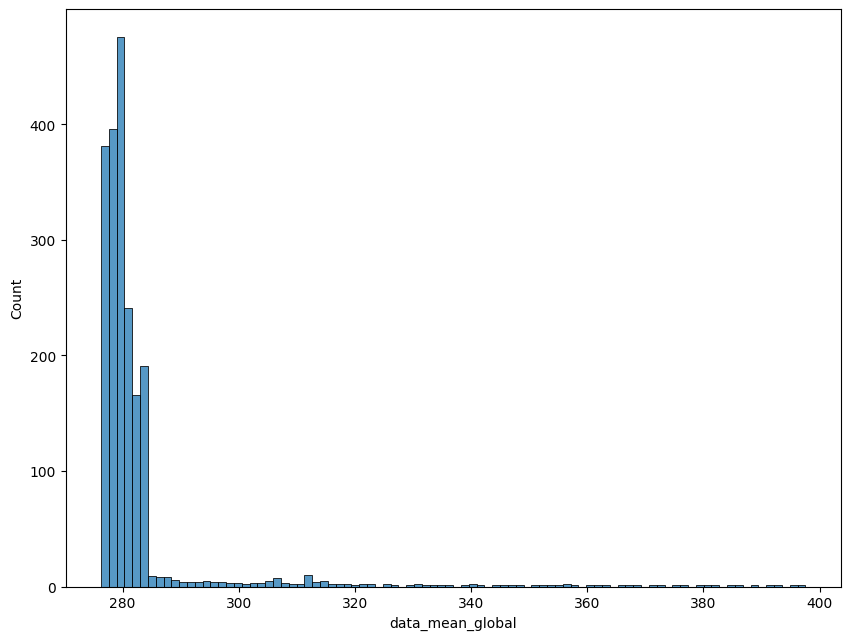

In [42]:
#create historgram of 'data_mean_global'
sns.histplot(x=co2_data["data_mean_global"])

<Axes: xlabel='data_mean_global', ylabel='Count'>

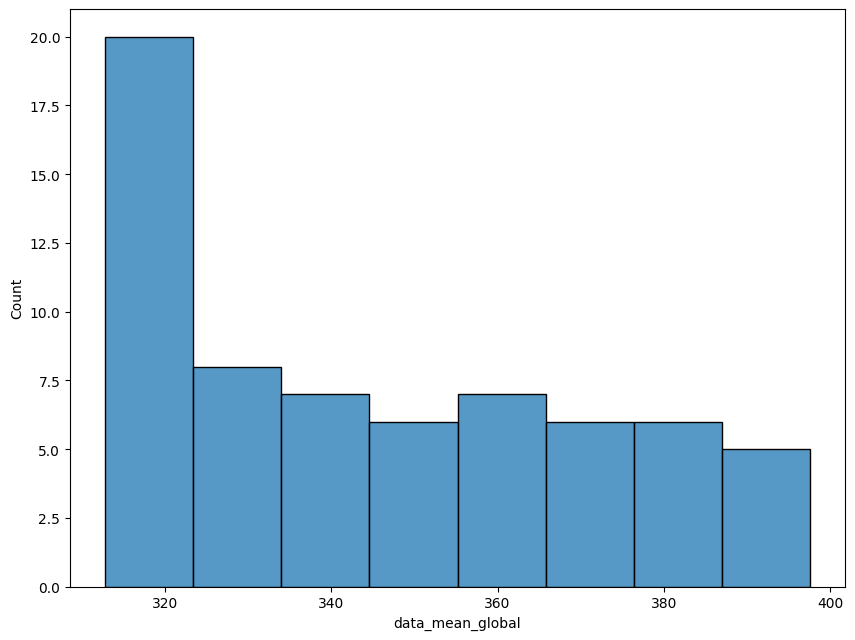

In [58]:
#create historgram of 'data_mean_global' from 1950 onwards
sns.histplot(x=co2_data.loc[co2_data["year"] >= 1950, 'data_mean_global'])

In [ ]:
# Let's only consider the data from the year 1950
#assign X with 'year'
X = 'year'

#assign y with 'data_mean_global'
y = 

#create a scatter plot on X and y with sns
#identify which among the follwoing should be on the x and y axis

#title is 'Historical Global Co2 concentration in the atmosphere'

#xlabel as 'Year'

#ylabel as 'CO2 Concentration in (ppm)'


## Fitting a Linear Regression (Using sklearn)

In [ ]:
#get 'values' from co2_data 'year' column from 1950 onwards


In [ ]:
#reshape the dimension of the array to be accepted to modelling


In [ ]:
help(np.reshape)

In [ ]:
help(LinearRegression)

In [ ]:
#Assign values to X and y variables
X = co2_data['year'].values[1950:].reshape(-1, 1)
y = co2_data['data_mean_global'].values[1950:].reshape(-1, 1)

#create a Linear Regresson model
reg = LinearRegression()

#Fit our data with the model
reg.fit(X, y)

#generate the slope and intercept from the fitted model so that we can create our linear model
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

Linear regression equation for this problem: 

$y = mx + b$ 

where: 
- slope (m) | y-intercept (b) <br><br>
$y = 1.358871192943465x - 2348.0338300545372$

**Let us plot the predictions against the true values**

In [ ]:
#Assign values to X and y variables
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

#get predictions based on dataset using the fitted model
predictions = reg.predict(X.reshape(-1, 1))


#embed a ascatter plot in a line plot (or vise versa)
plt.figure(figsize=(20, 8))

#scatter plot
plt.scatter(X, y, c='black')

#line plot
plt.plot(X, predictions, c='blue')

#labels and titles
plt.title('Historical Global CO2 Concentration in the Atmosphere')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')

#show the plot
plt.show()

## Fitting a Linear Regression (Using statsmodels)

In [ ]:
# what is your independent variable (X)
X = sm.add_constant(co2_data['year']).values[1950:]

#what data are you going to model?
y = co2_data['data_mean_global'].values[1950:]

#what model are you going to use
model = sm.OLS(y, X).fit()

#print the mdoel summary
print(model.summary())


#what are your insights? (recall your LANLM)

### Plotting the residuals using a QQ-plot

A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.

The advantages of the q-q plot are:

1. The sample sizes do not need to be equal.
2. Many distributional aspects can be simultaneously tested. For example, shifts in location, shifts in scale, changes in symmetry, and the presence of outliers can all be detected from this plot. For example, if the two data sets come from populations whose distributions differ only by a shift in location, the points should lie along a straight line that is displaced either up or down from the 45-degree reference line.

Reference: https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm

In [ ]:
residuals = model.resid

residuals

In [ ]:
#residuals = true value - predicted
residuals = model.resid

#create a qq_plot to know if residuals are normally distrubuted (meaning that the model is good otherwise bad)
#red line is the ideal good model (theoretical residual normal distribution quantiles)
qq_plot = sm.qqplot(residuals, line='q')


#show the plot
plt.show()

In [ ]:
# Make a histogram to see distrbution of residuals (again, normally distruibuted means good model bad otherwise) 
plt.hist(residuals);

## Conclusion

Doing a regression analysis for Co2 concentration is not a good model because the residuals of the models are not normally distributed.  

## Programming Exercise 

Each group is provided with a dataset to work on. Perform a descriptive and inferential analysis. Create a Jupyter Notebook Report as a submission. 

Guide questions for the report:
1. What is the data about? (State your observation and make assumptions)
2. Descriptive Analysis: what insights can be made?
3. Inferential Analysis: Is linear regression a good fit? (Perform both sklearn and statsmodels approach)
4. What is your conclusion?

Dataset:
Groups 1-2: Australian Beer Production
Groups 3-4: Debit Card Information

<Axes: ylabel='Count'>

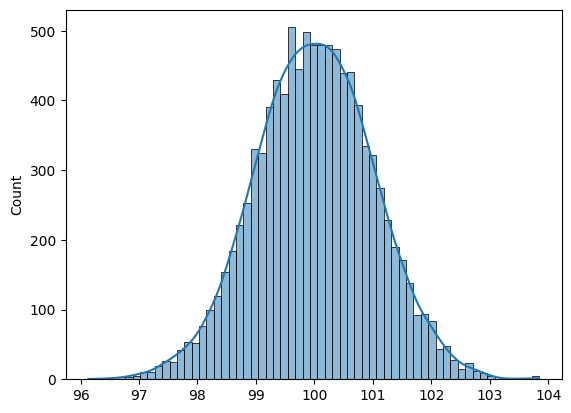

In [21]:
import numpy as np
import seaborn as sns
data = np.random.normal(loc=100, scale=1, size=10000) 
sns.histplot(data, kde=True)